In [30]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Boilerplate code
newparams = {'figure.figsize': (10.0, 5.0),
             'axes.grid': True,
             'lines.markersize': 8,
             'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)



# Single slit

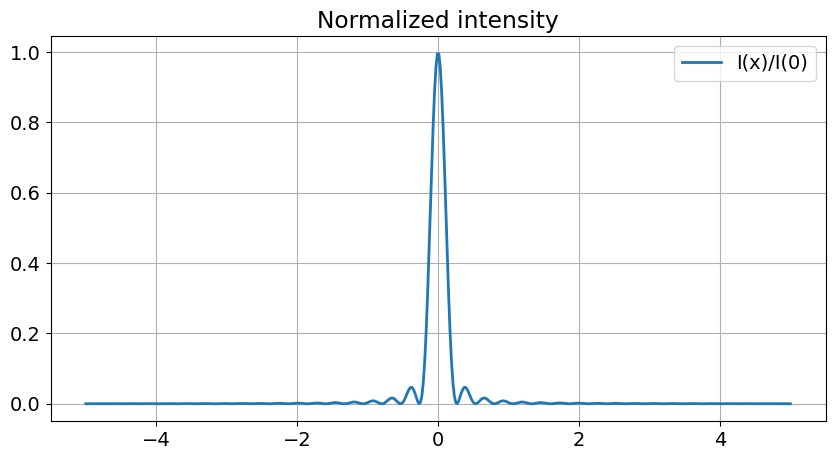

In [31]:
# Defining constants
lam = 532e-9    # Wavelength [m]
D = 2e-6        # Slit width [m]
y = 1           # Distance from slit to screen [m]

x = np.linspace(-5, 5, 500)

## def normalizedIntensity(lam, D, x, y):
##     return ((np.sin(np.pi*D*x/(lam*y))) / (np.pi*D*x/(lam*y)))**2
def normalizedIntensity(lam, D, x, y):
    u = np.pi * D * x / (lam * y)
    intensity = np.where(u == 0, 1, (np.sin(u) / u) ** 2)  # Avoid division by zero
    return intensity

Intensities = normalizedIntensity(lam, D, x, y)
plt.plot(x, Intensities, label="I(x)/I(0)")
plt.title("Normalized intensity")
# plt.ylim(0, 0.06)
plt.legend()
plt.show()

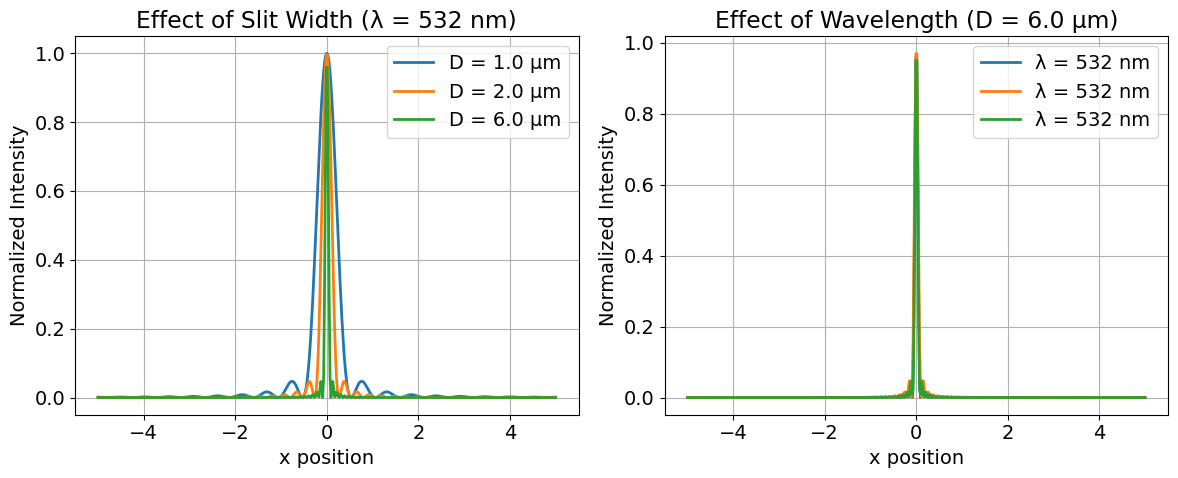

In [32]:
lam_vals = np.array([532e-9, 625e-9, 485e-9])   # Different wavelengths [m]
D_vals = np.array([1e-6, 2e-6,6e-6])            # Different slit widths [m]

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Left subs: changing D
for D in D_vals:
    axes[0].plot(x, normalizedIntensity(lam, D, x, y), label=f"D = {D*1e6:.1f} μm")
axes[0].set_title(f"Effect of Slit Width (λ = {lam*1e9:.0f} nm)")
axes[0].set_xlabel("x position")
axes[0].set_ylabel("Normalized Intensity")
axes[0].legend()

#Right subs: changing lambda
for lams in lam_vals:
    axes[1].plot(x, normalizedIntensity(lams, D, x, y), label=fr'λ = {lam*1e9:.0f} nm')
axes[1].set_title(fr"Effect of Wavelength (D = {D*1e6:.1f} μm)")
axes[1].set_xlabel("x position")
axes[1].set_ylabel("Normalized Intensity")
axes[1].legend()

plt.tight_layout()

plt.show()

# Double slit (Young's experiment)

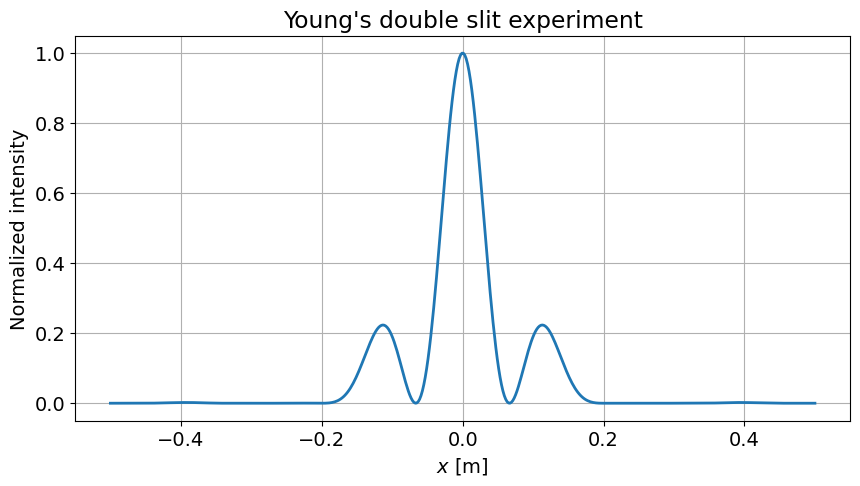

In [33]:
def Idoubleslit(D, l, lam, y, x):
    return (((np.sin((np.pi*D*x)/(lam*y))) / ((np.pi*D*x)/lam*y))**2 * (np.cos((np.pi*l*x)/(lam*y))))**2

# Defining constants
lam = 532e-9    # Wavelength [m]
D = 2e-6        # Slit width [m]
y = 1           # Distance from slit to screen [m]
l = 4e-6        # distance between slits [m]

x = np.linspace(-0.5, 0.5, 500)

plt.plot(x, Idoubleslit(D, l, lam, y, x))
plt.title("Young's double slit experiment")
plt.xlabel(r"$x$ [m]")
plt.ylabel("Normalized intensity")
plt.show()

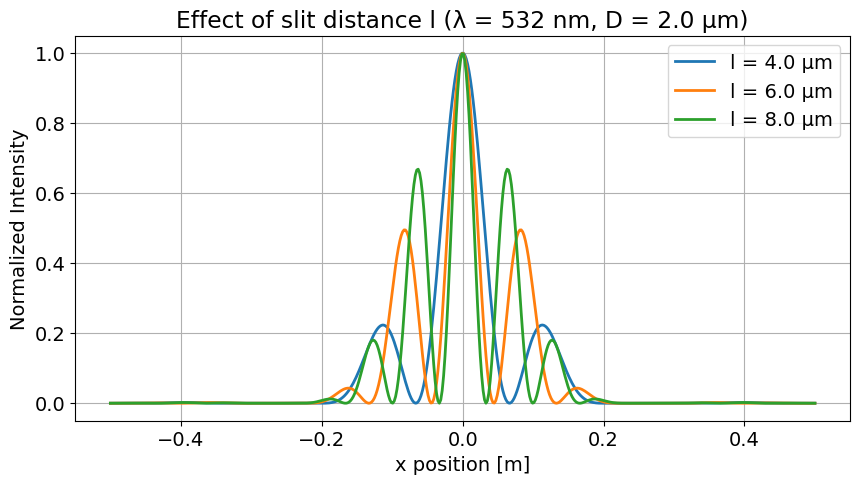

In [34]:
l_vals = np.array([4e-6, 6e-6, 8e-6])        # distance between slits [m]
for ls in l_vals:
    plt.plot(x, Idoubleslit(D, ls, lam, y, x), label=f"l = {ls*1e6:.1f} μm")
plt.title(f"Effect of slit distance l (λ = {lam*1e9:.0f} nm, D = {D*1e6:.1f} μm)")
plt.xlabel("x position [m]")
plt.ylabel("Normalized Intensity")
plt.legend()
plt.show()

# Diffraction grating

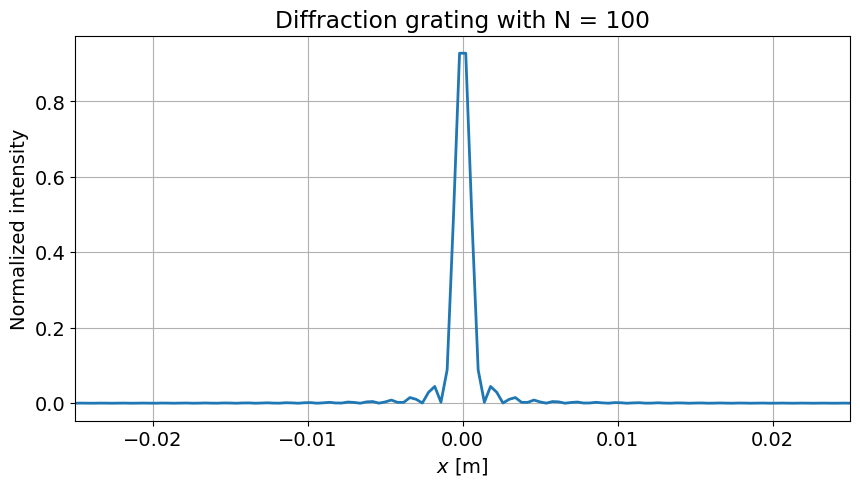

In [35]:
def diffGrating(D, l, lam, y, x, N):
    # Define constants
    k1 = (np.pi * D) # wavelength
    k2 = (np.pi * l) # wavelength

    # Compute the sinc-like terms
    term1 = np.sinc(k1 * x / y / np.pi)  # sinc(x) in numpy is sin(pi*x)/(pi*x)
    term2 = np.sinc(k2 * x / y / np.pi)

    # Compute the full expression
    result = (term1 ** 2) * (np.sinc(N * k2 * x / y / np.pi) / (N * term2)) ** 2
    return result

def diffgrating1(D, l, lam, y, x, N):
    Inorm = ((np.sin(np.pi*D*x/(lam*y))) / (np.pi*D*x/(lam*y)))**2 * (np.sin(N*np.pi*l*x/(lam*y))/(N*np.sin((np.pi*l*x/(lam*y)))))**2
    return Inorm

# Constants
lam = 532e-9    # Wavelength [m]
D = 2e-6        # Slit width [m]
y = 1           # Distance from slit to screen [m]
x = np.linspace(-1, 1, 5000)
l = 4e-6        # distance between slits [m]
N = 100           # Number of slits

# Plot
plt.plot(x, diffgrating1(D, l, lam, y, x, N))
plt.xlim(-.025, .025)
plt.title(f"Diffraction grating with N = {N}")
plt.xlabel(r"$x$ [m]")
plt.ylabel("Normalized intensity")
plt.show()

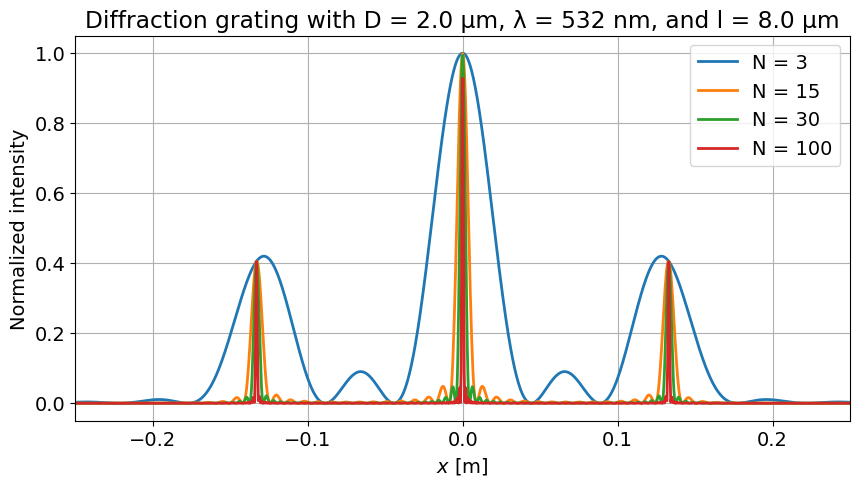

In [36]:
Ns = np.array([3, 15, 30, 100])
for Ni in Ns:
    plt.plot(x, diffgrating1(D, l, lam, y, x, Ni), label = f"N = {Ni}")
plt.xlim(-.25, .25)
plt.title(f"Diffraction grating with D = {D*1e6:.1f} μm, λ = {lam*1e9:.0f} nm, and l = {ls*1e6:.1f} μm")
plt.xlabel(r"$x$ [m]")
plt.ylabel("Normalized intensity")
plt.legend()
plt.show()